In [2]:
import json
import pandas as pd
import numpy as np
from datetime import datetime

In [8]:
# load the json file
reviews = []
i = 0
for line in open('/Users/zejiachen/Desktop/fall 2021/QTM385-DataAnalytics-Dataset/VoC/Toys_and_Games_5.json', 'r'):
    reviews.append(json.loads(line))
    i += 1
    if i > 35000:
        break

In [9]:
reviews[0]
print(len(reviews))

35001


In [13]:
dfReviews = pd.DataFrame(reviews)
dfReviews.reset_index(drop=True, inplace=True)

In [14]:
dfReviews.head()

,overall,vote,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,image
0,5.0,3,True,"10 6, 2013",A2LSCFZM2FBZK7,0486427706,{'Format:': ' Paperback'},Ginger,The stained glass pages are pretty cool. And i...,Nice book,1381017600,NaN
1,5.0,9,True,"08 9, 2013",A3IXP5VS847GE5,0486427706,{'Format:': ' Paperback'},Dragonflies &amp; Autumn Leaves,My 11 y.o. loved this...and so do I (you know ...,Great pictures,1376006400,NaN
2,5.0,NaN,True,"04 5, 2016",A1274GG1EB2JLJ,0486427706,{'Format:': ' Paperback'},barbara ann,"The pictures are great , I've done one and gav...","The pictures are great, I've done one and gave...",1459814400,NaN
3,5.0,3,True,"02 13, 2016",A30X5EGBYAZQQK,0486427706,{'Format:': ' Paperback'},Samantha,I absolutely love this book! Its translucent p...,So beautiful!,1455321600,NaN
4,5.0,NaN,True,"12 10, 2015",A3U6UNXLAUY6ZV,0486427706,{'Format:': ' Paperback'},CP in Texas,I love it!,Five Stars,1449705600,NaN


---
### Exploratory Analysis

In [15]:
dfReviews.dtypes

overall           float64
vote               object
verified             bool
reviewTime         object
reviewerID         object
asin               object
style              object
reviewerName       object
reviewText         object
summary            object
unixReviewTime      int64
image              object
dtype: object

In [16]:
# unique of products
print('numUniqueProduct: ' + str(dfReviews.asin.nunique()))

# unique customer 
print('numUniqueCustomer: ' + str(dfReviews.reviewerID.nunique()))

numUniqueProduct: 931
numUniqueCustomer: 28544


In [17]:
dfReviews['reviewTime'] =  pd.to_datetime(dfReviews['reviewTime'])

In [18]:
dfReviews.head()

,overall,vote,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,image
0,5.0,3,True,2013-10-06,A2LSCFZM2FBZK7,0486427706,{'Format:': ' Paperback'},Ginger,The stained glass pages are pretty cool. And i...,Nice book,1381017600,NaN
1,5.0,9,True,2013-08-09,A3IXP5VS847GE5,0486427706,{'Format:': ' Paperback'},Dragonflies &amp; Autumn Leaves,My 11 y.o. loved this...and so do I (you know ...,Great pictures,1376006400,NaN
2,5.0,NaN,True,2016-04-05,A1274GG1EB2JLJ,0486427706,{'Format:': ' Paperback'},barbara ann,"The pictures are great , I've done one and gav...","The pictures are great, I've done one and gave...",1459814400,NaN
3,5.0,3,True,2016-02-13,A30X5EGBYAZQQK,0486427706,{'Format:': ' Paperback'},Samantha,I absolutely love this book! Its translucent p...,So beautiful!,1455321600,NaN
4,5.0,NaN,True,2015-12-10,A3U6UNXLAUY6ZV,0486427706,{'Format:': ' Paperback'},CP in Texas,I love it!,Five Stars,1449705600,NaN


In [19]:
dfReviewNew = dfReviews.drop(columns=['verified', 'reviewerName', 'image', 'style', 'unixReviewTime'])
dfReviewNew.head()

,overall,vote,reviewTime,reviewerID,asin,reviewText,summary
0,5.0,3,2013-10-06,A2LSCFZM2FBZK7,0486427706,The stained glass pages are pretty cool. And i...,Nice book
1,5.0,9,2013-08-09,A3IXP5VS847GE5,0486427706,My 11 y.o. loved this...and so do I (you know ...,Great pictures
2,5.0,NaN,2016-04-05,A1274GG1EB2JLJ,0486427706,"The pictures are great , I've done one and gav...","The pictures are great, I've done one and gave..."
3,5.0,3,2016-02-13,A30X5EGBYAZQQK,0486427706,I absolutely love this book! Its translucent p...,So beautiful!
4,5.0,NaN,2015-12-10,A3U6UNXLAUY6ZV,0486427706,I love it!,Five Stars


In [20]:
dfReviewNew.head()

,overall,vote,reviewTime,reviewerID,asin,reviewText,summary
0,5.0,3,2013-10-06,A2LSCFZM2FBZK7,0486427706,The stained glass pages are pretty cool. And i...,Nice book
1,5.0,9,2013-08-09,A3IXP5VS847GE5,0486427706,My 11 y.o. loved this...and so do I (you know ...,Great pictures
2,5.0,NaN,2016-04-05,A1274GG1EB2JLJ,0486427706,"The pictures are great , I've done one and gav...","The pictures are great, I've done one and gave..."
3,5.0,3,2016-02-13,A30X5EGBYAZQQK,0486427706,I absolutely love this book! Its translucent p...,So beautiful!
4,5.0,NaN,2015-12-10,A3U6UNXLAUY6ZV,0486427706,I love it!,Five Stars


In [21]:
dfReviewNew.groupby(['overall'])['reviewerID'].count()

overall
1.0     1054
2.0     1046
3.0     2480
4.0     5214
5.0    25207
Name: reviewerID, dtype: int64

---
### Some NLP Analysis

In [192]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/zejiachen/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [23]:
dfReviewNew.head()

,overall,vote,reviewTime,reviewerID,asin,reviewText,summary
0,5.0,3,2013-10-06,A2LSCFZM2FBZK7,0486427706,The stained glass pages are pretty cool. And i...,Nice book
1,5.0,9,2013-08-09,A3IXP5VS847GE5,0486427706,My 11 y.o. loved this...and so do I (you know ...,Great pictures
2,5.0,NaN,2016-04-05,A1274GG1EB2JLJ,0486427706,"The pictures are great , I've done one and gav...","The pictures are great, I've done one and gave..."
3,5.0,3,2016-02-13,A30X5EGBYAZQQK,0486427706,I absolutely love this book! Its translucent p...,So beautiful!
4,5.0,NaN,2015-12-10,A3U6UNXLAUY6ZV,0486427706,I love it!,Five Stars


In [24]:
stopwords = set(stopwords.words('english'))

In [25]:
# convert selected column to String
dfReviewNew[['reviewerID', 'asin', 'reviewText','summary']] = dfReviewNew[['reviewerID', 'asin', 'reviewText','summary']].astype(str)



In [38]:
# convert all to lowercase
dfReviewNew["reviewText"] = dfReviewNew["reviewText"].str.lower()
dfReviewNew["summary"] = dfReviewNew["summary"].str.lower()

In [98]:
## define a function for word-cloud
# change the value to black
def black_color_func(word, font_size, position,orientation,random_state=None, **kwargs):
    return("hsl(0,100%, 1%)")

def word_cloud(data, col: str):
    # term frenquency word cloud
    long_string = ','.join(list(data[col].values))

    wordcloud = WordCloud(font_path = '/Library/Fonts/Arial Unicode.ttf', background_color="white", width=3000, height=2000, max_words=250, collocations=False).generate(long_string)
    # set the word color to black
    wordcloud.recolor(color_func = black_color_func)
    # set the figsize
    plt.figure(figsize=[15,10])
    # plot the wordcloud
    plt.imshow(wordcloud, interpolation="bilinear")
    # remove plot axes
    plt.axis("off")

def word_cloudFreq(d: dict):
    wordcloud = WordCloud(font_path = '/Library/Fonts/Arial Unicode.ttf', background_color="white", width=3000, height=2000, max_words=250, collocations=False).generate_from_frequencies(d)
    # set the word color to black
    wordcloud.recolor(color_func = black_color_func)
    # set the figsize
    plt.figure(figsize=[15,10])
    # plot the wordcloud
    plt.imshow(wordcloud, interpolation="bilinear")
    # remove plot axes
    plt.axis("off")

    

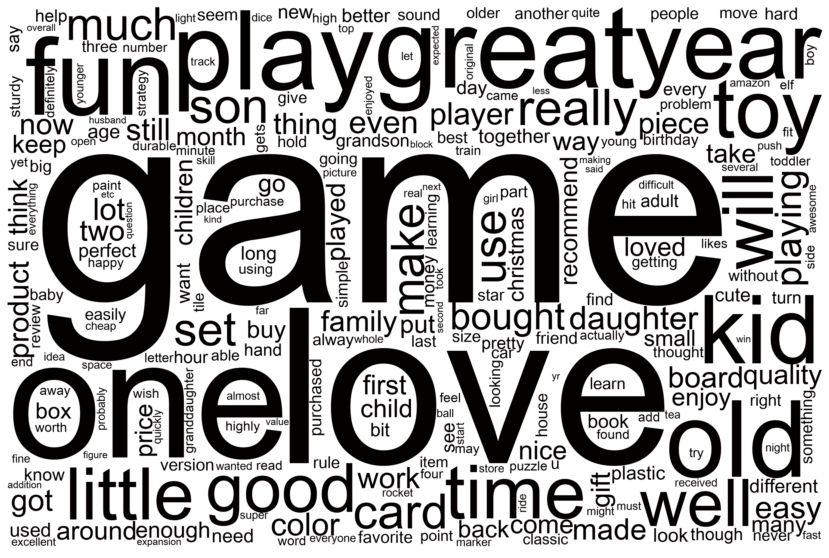

In [99]:
word_cloud(dfReviewNew, 'reviewText')

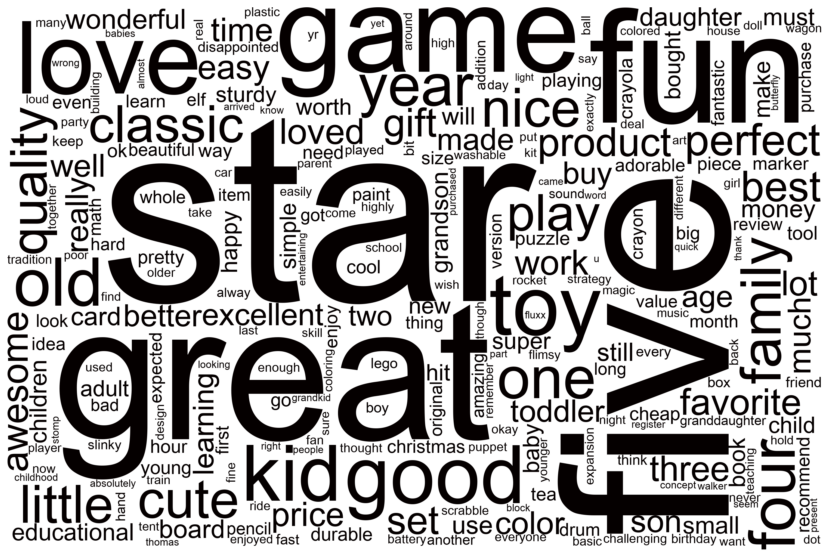

In [100]:
word_cloud(dfReviewNew, 'summary')

---
## Vectorization
<b>For 'reviewText'</b>

In [27]:
# import CountVectorizer from sk-learn
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction import text 
import nltk.stem

In [29]:
# remove tokens containing digits
def no_number_preprocessor(tokens):
    r = re.sub('(\d)+', 'NUM', tokens.lower())
    # This alternative just removes numbers:
    # r = re.sub('(\d)+', '', tokens.lower())
    return r

In [43]:
english_stemmer = nltk.stem.SnowballStemmer('english')

class StemmedCountVectorizer(CountVectorizer):
    def build_analyzer(self):
        analyzer = super(StemmedCountVectorizer, self).build_analyzer()
        return lambda doc: ([english_stemmer.stem(w) for w in analyzer(doc)])

cvs2 = StemmedCountVectorizer(min_df=3, analyzer="word", stop_words='english', preprocessor=no_number_preprocessor)

# generates document-term matrix for all the docs
dtmReview2 = cvs2.fit_transform(dfReviewNew['reviewText'])


In [44]:
# check the shape
print(dtmReview2.shape)

# get feature name with stemmed words removed
features_stemRemoved = cvs2.get_feature_names()
features_stemRemoved[250:260]

(35001, 7158)


['arch',
 'archer',
 'architect',
 'arctic',
 'area',
 'aren',
 'arena',
 'argh',
 'argu',
 'argument']

Number of Reviews: <b>35001</b> <br>
Nuber of Features: <b>7158</b>

In [35]:
# use the built-in English stopwords list
cvs = CountVectorizer(stop_words='english')

# generates document-term matrix for all the docs
dtmReview = cvs.fit_transform(dfReviewNew['reviewText'])

# check the shape
dtmReview.shape

(35001, 25273)

Number of Reviews: <b>35001</b> <br>
Nuber of Features w/ no stemmed removed: <b>25273</b>

In [50]:
# get feature name
features = cvs.get_feature_names()
features[1000:1010]

['activity',
 'acto',
 'actor',
 'actors',
 'actress',
 'acts',
 'actual',
 'actuality',
 'actually',
 'acurate']


<b>Vectorizing 'Summary'</b>

In [41]:
cvs2 = StemmedCountVectorizer(min_df=3, analyzer="word", stop_words='english', preprocessor=no_number_preprocessor)

# generates document-term matrix for all the docs
dtmReviewSummary = cvs2.fit_transform(dfReviewNew['summary'])

# check the shape
print(dtmReview2.shape)

(35001, 2067)


Number of Reviews: <b>35001</b> <br>
Nuber of Features: <b>2067</b>

---
## Sentimental Analysis using VADER

In [31]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import re

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/zejiachen/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [46]:
# customize the stop words
my_additional_stop_words = ['num', 'just', 'number']
stopWords = text.ENGLISH_STOP_WORDS.union(my_additional_stop_words)

In [47]:
sid = SentimentIntensityAnalyzer()

In [48]:
dfReviewSen = dfReviewNew.copy()

In [49]:
# adding new columns to the df
dfReviewSen['negative'] = ''
dfReviewSen['neutral'] = ''
dfReviewSen['positive'] = ''
dfReviewSen['compound'] = ''

In [50]:
for i in range(len(dfReviewSen.index)):
    scores = sid.polarity_scores(dfReviewSen['reviewText'][i])
    dfReviewSen['negative'][i] = scores['neg']
    dfReviewSen['neutral'][i] = scores['neu']
    dfReviewSen['positive'][i] = scores['pos']
    dfReviewSen['compound'][i] = scores['compound']

<ipython-input-50-5d7bd54ffebf>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfReviewSen['negative'][i] = scores['neg']
<ipython-input-50-5d7bd54ffebf>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfReviewSen['neutral'][i] = scores['neu']
<ipython-input-50-5d7bd54ffebf>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfReviewSen['positive'][i] = scores['pos']
<ipython-input-50-5d7bd54ffebf>:6: SettingWithCopyWarning: 
A value 

In [112]:
dfReviewSen[:7]

,overall,vote,reviewTime,reviewerID,asin,reviewText,summary,negative,neutral,positive,compound
0,5.0,3,2013-10-06,A2LSCFZM2FBZK7,0486427706,the stained glass pages are pretty cool. and i...,nice book,0,0.636,0.364,0.9233
1,5.0,9,2013-08-09,A3IXP5VS847GE5,0486427706,my 11 y.o. loved this...and so do i (you know ...,great pictures,0.021,0.719,0.26,0.986
2,5.0,NaN,2016-04-05,A1274GG1EB2JLJ,0486427706,"the pictures are great , i've done one and gav...","the pictures are great, i've done one and gave...",0,0.581,0.419,0.8779
3,5.0,3,2016-02-13,A30X5EGBYAZQQK,0486427706,i absolutely love this book! its translucent p...,so beautiful!,0,0.661,0.339,0.9682
4,5.0,NaN,2015-12-10,A3U6UNXLAUY6ZV,0486427706,i love it!,five stars,0,0.182,0.818,0.6696
5,5.0,NaN,2015-10-26,A1SAJF5SNM6WJS,0486427706,my husband loved it. he is in to dragons.,five stars,0,0.672,0.328,0.5994
6,5.0,NaN,2015-10-12,A2HK5AVQW6AUQ5,0486427706,love it,five stars,0,0.192,0.808,0.6369


In [115]:
# getting top positive & negative reviews
colName = list(dfReviewSen)
mostPosReviews = dfReviewSen.loc[(dfReviewSen['compound'] > 0.7) & (dfReviewSen['overall'] > 3.5), colName]
mostNegReviews = dfReviewSen.loc[(dfReviewSen['compound'] < -0.5) & (dfReviewSen['overall'] < 4), colName]

In [116]:
print(mostPosReviews.shape)

# according to the client's concern, we are all intereted in the negative reviews
print(mostNegReviews.shape)

(18843, 11)
(642, 11)


VADER think that there are <b>18843</b> pieces of positive reviews and <b>642</b> pieces of negative reviews


### Tokenizing our Pos/Neg Reviews

In [117]:
cvs_neg = StemmedCountVectorizer(min_df=3, analyzer="word", stop_words=stopWords)

# generates document-term matrix for all the docs
dtmNegReview = cvs_neg.fit_transform(mostNegReviews['reviewText'])


In [118]:
# check the shape
print(dtmNegReview.shape)

# get feature name with stemmed words removed
features_negReview = cvs_neg.get_feature_names()

(642, 1065)


Number of Reviews: <b>642</b> <br>
Nuber of Features: <b>1065</b>

Also create another DTM with bigram to put the words into more contexts

In [119]:
## check n-gram
bigram_cvNeg = StemmedCountVectorizer(min_df=3, analyzer="word", stop_words=stopWords, ngram_range=(2, 2))
dtmBigramNeg=bigram_cvNeg.fit_transform(mostNegReviews['reviewText'])


In [120]:
# check the shape
print(dtmBigramNeg.shape)

# get feature name with stemmed words removed
features_negReview_bigram = bigram_cvNeg.get_feature_names()


(642, 245)


Number of Reviews: <b>652</b> <br>
Nuber of Bi-gram Features: <b>245</b>

<b>Finding out the TopWords in negative review</b>

In [121]:
# print top words
# here's our number of features
num_negFeats = dtmNegReview.shape[1] # using the doc-term matrix from up above w/ the stopwords

# here's a dictionary to store the features and counts key/value pairs
negFeature_dict = {}

for x in range(num_negFeats):      # iterate over the number of features
    key = cvs_neg.get_feature_names()[x]  # get the feature name at position [x]
                                              # note that we're using the stopwords cv object
    value = dtmNegReview.toarray().sum(axis=0)[x]  # sum the counts of the feature at position [x] for all documents
    
    negFeature_dict[key] = value # add the new key/value pair to the dictionary
    
# then sort the dictionary in order of counts
sortFeats = sorted(negFeature_dict.items(), key=lambda x: x[1], reverse=True)


In [249]:
# then print top 30

for item in sortFeats[20:50]:
    print(str(item[0]) + ": " + str(item[1]))

bought: 83
hard: 81
got: 77
look: 75
son: 74
thing: 74
child: 72
money: 71
batteri: 70
good: 69
product: 69
daughter: 67
fun: 67
think: 67
bad: 65
frustrat: 65
way: 65
open: 64
doesn: 63
tri: 63
purchas: 62
didn: 61
set: 61
board: 58
color: 54
broke: 53
new: 52
want: 52
cheap: 51
broken: 50


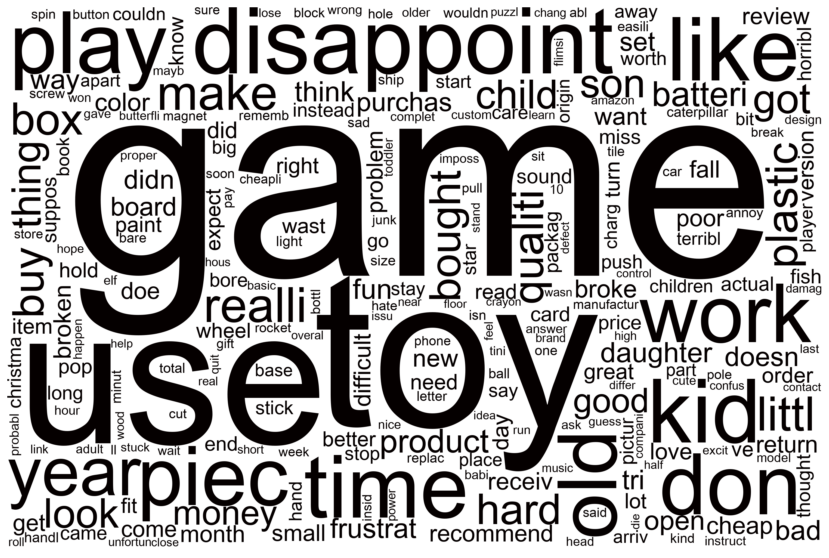

In [123]:
word_cloudFreq(negFeature_dict)

<b>Finding out the Bi-gram words in negative reviews</b>

In [127]:
# print top words
# here's our number of features
num_negBigramFeats = dtmBigramNeg.shape[1] # using the doc-term matrix from up above w/ the stopwords

# here's a dictionary to store the features and counts key/value pairs
negBigramFeature_dict = {}

for x in range(num_negBigramFeats):      # iterate over the number of features
    key = bigram_cvNeg.get_feature_names()[x]  # get the feature name at position [x]
                                              # note that we're using the stopwords cv object
    value = dtmBigramNeg.toarray().sum(axis=0)[x]  # sum the counts of the feature at position [x] for all documents
    
    negBigramFeature_dict[key] = value # add the new key/value pair to the dictionary
    
# then sort the dictionary in order of counts
sortNegBigramFeats = sorted(negBigramFeature_dict.items(), key=lambda x: x[1], reverse=True)


In [248]:
# then print top 30

for item in sortNegBigramFeats[0:20]:
    print(str(item[0]) + ": " + str(item[1]))

year old: 73
waste money: 26
poor qual: 12
stopped work: 12
customer servic: 11
don know: 11
fishing pol: 11
month old: 11
doesn work: 10
don buy: 10
don fit: 10
yr old: 10
board gam: 9
does work: 9
don lik: 9
don think: 9
game play: 9
old son: 9
years ago: 9
brand new: 8


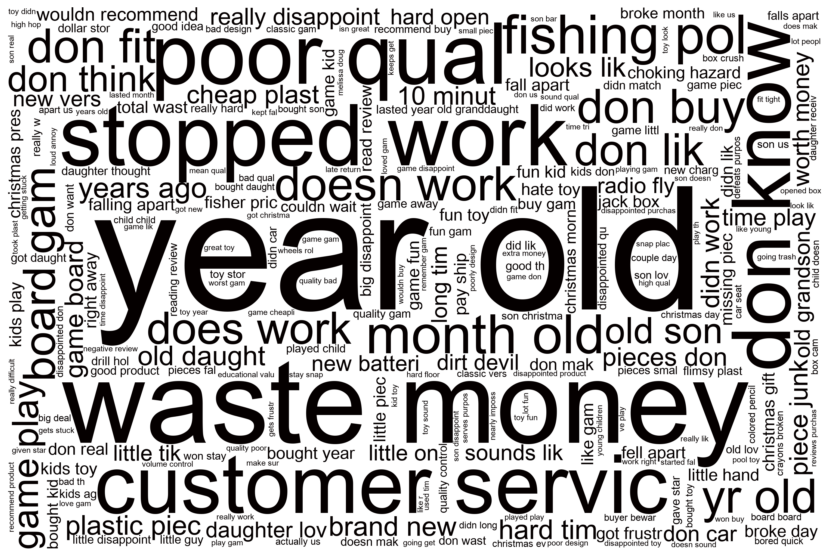

In [129]:
word_cloudFreq(negBigramFeature_dict)

### We will use the same approach to analyze the Negative summary

In [130]:
# generates document-term matrix for all the docs
dtmNegSummary = cvs_neg.fit_transform(mostNegReviews['summary'])

## check n-gram
bigram_cvNeg = StemmedCountVectorizer(min_df=3, analyzer="word", stop_words=stopWords, ngram_range=(2, 2))
dtmBigramNegSummary=bigram_cvNeg.fit_transform(mostNegReviews['summary'])

# check the shape
print(dtmNegSummary.shape)
print(dtmBigramNegSummary.shape)

(642, 166)
(642, 15)


<b>Finding out the TopWords in negative summary</b>

In [131]:
# print top words
# here's our number of features
num_negFeatsSummary = dtmNegSummary.shape[1] # using the doc-term matrix from up above w/ the stopwords

# here's a dictionary to store the features and counts key/value pairs
negFeatureSummary_dict = {}

for x in range(num_negFeatsSummary):      # iterate over the number of features
    key = cvs_neg.get_feature_names()[x]  # get the feature name at position [x]
                                              # note that we're using the stopwords cv object
    value = dtmNegSummary.toarray().sum(axis=0)[x]  # sum the counts of the feature at position [x] for all documents
    
    negFeatureSummary_dict[key] = value # add the new key/value pair to the dictionary
    
# then sort the dictionary in order of counts
sortNegFeatsSummary = sorted(negFeatureSummary_dict.items(), key=lambda x: x[1], reverse=True)

In [132]:
# then print top 30
for item in sortNegFeatsSummary[0:20]:
    print(str(item[0]) + ": " + str(item[1]))

qualiti: 36
star: 36
disappoint: 33
game: 31
don: 30
great: 25
toy: 25
fun: 24
money: 24
buy: 23
bad: 21
good: 20
kid: 19
wast: 19
work: 19
cheap: 17
poor: 17
piec: 15
broke: 13
doesn: 13


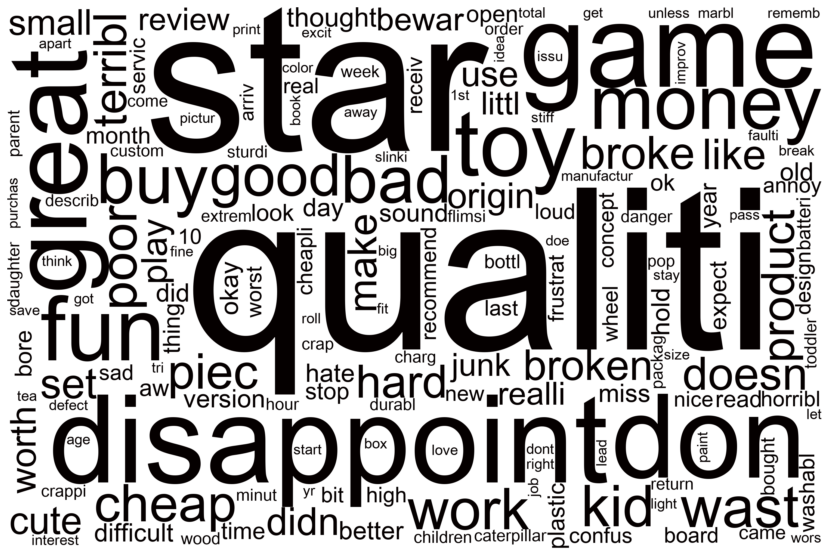

In [133]:
# word cloud = Negative Review Summary
word_cloudFreq(negFeatureSummary_dict)

In [134]:
# print top words
# here's our number of features
num_BigramFeatsSummary = dtmBigramNegSummary.shape[1] # using the doc-term matrix from up above w/ the stopwords

# here's a dictionary to store the features and counts key/value pairs
negBigramFeatureSummary_dict = {}

for x in range(num_BigramFeatsSummary):      # iterate over the number of features
    key = bigram_cvNeg.get_feature_names()[x]  # get the feature name at position [x]
                                              # note that we're using the stopwords cv object
    value = dtmNegSummary.toarray().sum(axis=0)[x]  # sum the counts of the feature at position [x] for all documents
    
    negBigramFeatureSummary_dict[key] = value # add the new key/value pair to the dictionary
    
# then sort the dictionary in order of counts
sortNegFeatsSummaryBi = sorted(negBigramFeatureSummary_dict.items(), key=lambda x: x[1], reverse=True)

# then print top 30
for item in sortNegFeatsSummaryBi[0:20]:
    print(str(item[0]) + ": " + str(item[1]))

piece junk: 21
stopped work: 8
save money: 7
great gam: 6
bad qual: 5
don buy: 5
waste money: 5
yr old: 5
great concept: 4
poor qual: 4
customer servic: 3
doesn work: 3
don wast: 3
hard open: 3
terrible qu: 3


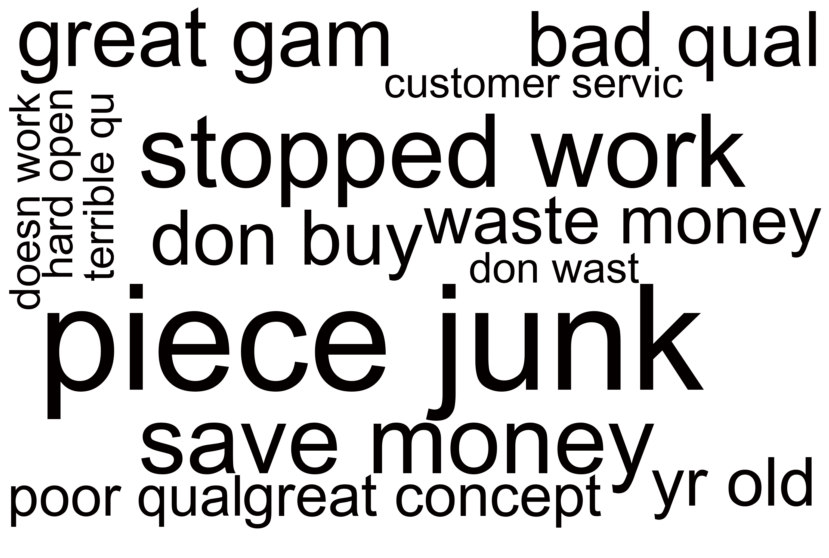

In [135]:
# word cloud = Negative Review Summary
word_cloudFreq(negBigramFeatureSummary_dict)

### We want to know what are some reivew that contain these top words

In [190]:
mostNegReviews.head()

,overall,vote,reviewTime,reviewerID,asin,reviewText,summary,negative,neutral,positive,compound
13,1.0,NaN,2015-08-16,A3O6CP5TT54LJE,0486448789,total waste of money. the stickers do not stic...,save your money,0.117,0.853,0.03,-0.7232
20,2.0,NaN,2015-02-15,A3EAVL6N8Q6MOA,0486448789,they were ok but not really considered it a bo...,really small disappointed!,0.295,0.608,0.097,-0.6439
89,1.0,NaN,2015-12-26,A1BO4MHL71C9NF,0545561647,book is nice but pom poms never come out right...,book is nice but pom poms never come out right,0.147,0.761,0.093,-0.6833
100,3.0,2,2015-01-29,A3ARDLC6KTLIEY,0545561647,book is ok. it was delivered in excellent cond...,book is definitely for 8 and up!,0.162,0.713,0.125,-0.5416
108,3.0,16,2014-01-12,A1EVV74UQYVKRY,0545561647,my daughter wanted this so badly. so she forke...,"so excited to try, difficult to execute",0.106,0.836,0.057,-0.6749


In [280]:
neg_timeSeries = pd.DataFrame(data=dtmNegReview.toarray(),columns=features_negReview)
neg_timeSeries.head()

,00,10,11,12,13,14,15,18,1st,20,...,wrong,yarn,year,yellow,yes,young,younger,yoyo,yr,zero
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,2,2,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [281]:
vector = list(neg_timeSeries["disappoint"])
total = list(neg_timeSeries.sum(axis=1))

neg_timeSeriesDF = pd.DataFrame(mostNegReviews['reviewTime'], columns = ['reviewTime'])
neg_timeSeriesDF['disappoint'] = vector
neg_timeSeriesDF['total'] = total

In [282]:
neg_timeSeriesDF.head()

,reviewTime,disappoint,total
13,2015-08-16,0,25
20,2015-02-15,1,7
89,2015-12-26,1,21
100,2015-01-29,1,31
108,2014-01-12,0,48


In [283]:
neg_timeSeriesGroupBy = pd.DataFrame(neg_timeSeriesDF.groupby(['reviewTime'])[['disappoint', 'total']].apply(sum))
neg_timeSeriesGroupBy.head()

,disappoint,total
reviewTime,,
2002-01-23,0,37
2002-06-20,0,53
2002-11-27,0,28
2002-12-10,0,51
2002-12-17,0,24


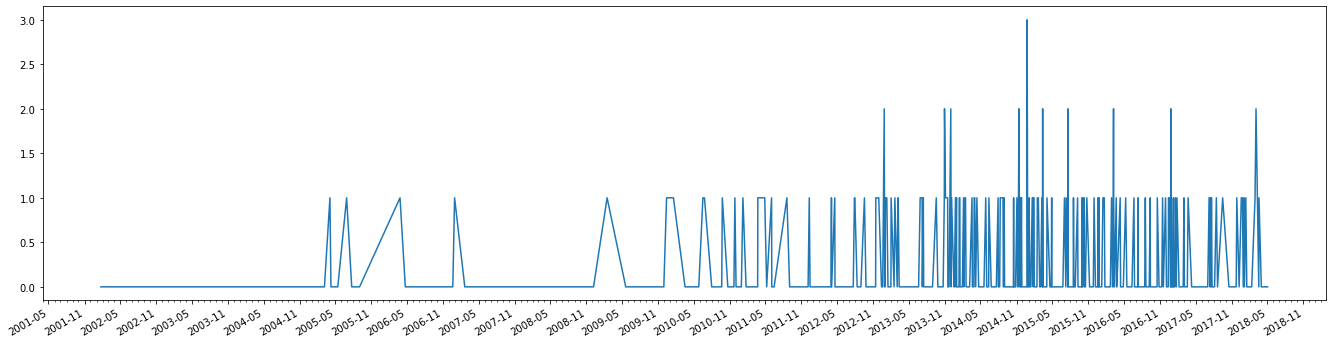

In [223]:
fig, ax = plt.subplots(figsize=(23, 6))

half_year_locator = mdates.MonthLocator(interval=6)
year_month_formatter = mdates.DateFormatter("%Y-%m") # four digits for year, two for month

monthly_locator = mdates.MonthLocator()
ax.xaxis.set_major_locator(half_year_locator)
ax.xaxis.set_minor_locator(monthly_locator)
ax.xaxis.set_major_formatter(year_month_formatter)

ax.plot(neg_timeSeriesGroupBy['disappoint']);

# Rotates and right aligns the x labels. 
# Also moves the bottom of the axes up to make room for them.
fig.autofmt_xdate()

---
## plotting..

In [251]:
badWords_Bigram = ['waste money', 'poor qual', 'doesn work', 'don buy'
                   , 'cheap plast', 'fall apart', 'falling apart', 'fell apart', 'didn lik', 'choking hazard',
            'wouldn recommend', 'broke month', 'total wast', 'bad qual',
             'bad design', 'flimsy plast', 'falls apart', 'disappointed', 'isn great', 'wouldn buy', 'started fal']

In [ ]:
badWords = ['poor', 'bad', 'disappoint']

In [265]:
features_negReview_bigram

['10 minut',
 'actually us',
 'apart us',
 'bad design',
 'bad qual',
 'bad th',
 'big deal',
 'big disappoint',
 'board board',
 'board gam']

In [274]:
# check the shape
print(dtmReview_bigram.shape)

# get feature name with stemmed words removed
features_Review_bigram = cvs_bigram.get_feature_names()

(35001, 41754)


In [285]:
cvs_bigram = StemmedCountVectorizer(min_df=3, analyzer="word", stop_words='english', ngram_range=(2, 2))

dtmReview_bigram = cvs_bigram.fit_transform(dfReviewNew['reviewText'])


reviewVec_bigram = pd.DataFrame(data=dtmReview_bigram.toarray(),columns=features_Review_bigram)
reviewVec_bigram.head()

,00 plus,01fhslqo9ss png,10 00,10 10,10 100,10 11,10 12,10 13,10 15,10 20,...,zip lin,zip lock,zip ti,ziploc bag,ziplock bag,zipper pag,zippered pouch,zombie dic,zombie fluxx,zoo alphabet
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [278]:
reviewVec_bigramDF = pd.DataFrame(dfReviewNew['reviewTime'], columns = ['reviewTime'])
reviewVec_bigramDF['total'] = list(reviewVec_bigram.sum(axis=1))

reviewVec_time_DF

,reviewTime,total
0,2013-10-06,0.0
1,2013-08-09,0.0
2,2016-04-05,0.0
3,2016-02-13,0.0
4,2015-12-10,0.0
...,...,...
34996,2017-09-16,0.0
34997,2017-08-24,0.0
34998,2017-07-24,0.0
34999,2017-07-01,0.0


<b>plotting time series for Bi-gram</b>

In [239]:
neg_time_Bigram = pd.DataFrame(data=dtmBigramNeg.toarray(),columns=features_negReview_bigram)
neg_time_Bigram.head()

,10 minut,actually us,apart us,bad design,bad qual,bad th,big deal,big disappoint,board board,board gam,...,work right,worst gam,worth money,wouldn buy,wouldn recommend,year old,years ago,years old,young children,yr old
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [240]:
neg_time_BigramDF = pd.DataFrame(mostNegReviews['reviewTime'], columns = ['reviewTime'])
neg_time_BigramDF['bad design'] = list(neg_timeSeries_Bigram["bad design"])
neg_time_BigramDF['total'] = list(neg_timeSeries_Bigram.sum(axis=1))

neg_time_BigramDF.head()

,reviewTime,bad design,total
13,2015-08-16,0,3
20,2015-02-15,0,0
89,2015-12-26,0,0
100,2015-01-29,0,0
108,2014-01-12,0,3


In [242]:
neg_time_BigramGroupBy = pd.DataFrame(neg_time_BigramDF.groupby(['reviewTime'])[['bad design', 'total']].apply(sum))
neg_time_BigramGroupBy.head()

,bad design,total
reviewTime,,
2002-01-23,0,2
2002-06-20,0,2
2002-11-27,0,3
2002-12-10,0,2
2002-12-17,0,0


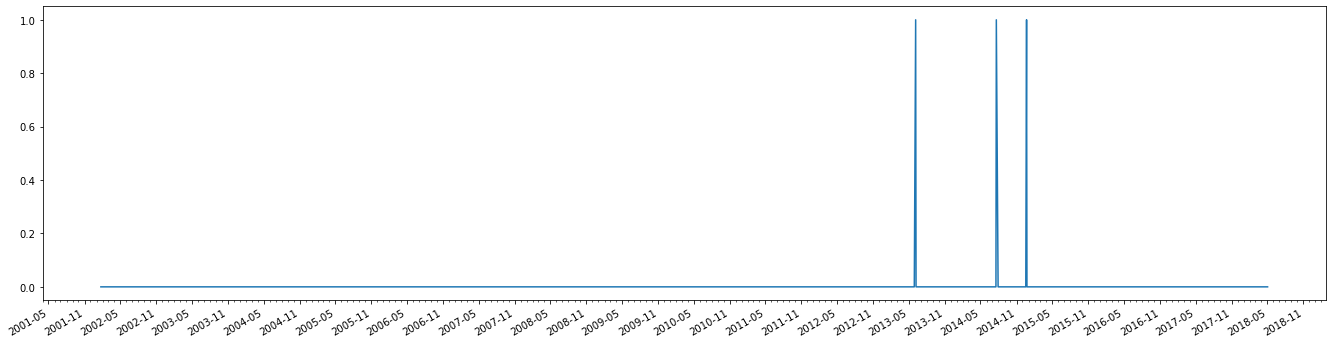

In [243]:
fig, ax = plt.subplots(figsize=(23, 6))

half_year_locator = mdates.MonthLocator(interval=6)
year_month_formatter = mdates.DateFormatter("%Y-%m") # four digits for year, two for month

monthly_locator = mdates.MonthLocator()
ax.xaxis.set_major_locator(half_year_locator)
ax.xaxis.set_minor_locator(monthly_locator)
ax.xaxis.set_major_formatter(year_month_formatter)

ax.plot(neg_time_BigramGroupBy['bad design']);

# Rotates and right aligns the x labels. 
# Also moves the bottom of the axes up to make room for them.
fig.autofmt_xdate()

---
## Storing...

In [214]:
dfReviewNew.to_csv('reviewSample.csv', index=False)
mostPosReviews.to_csv('mostPosReview.csv', index=False)
mostNegReviews.to_csv('mostNegReview.csv', index=False)